<a href="https://colab.research.google.com/github/tewei0328/AI/blob/master/%E5%96%AE%E5%85%836/6-4_ML_prophet_tsmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stocker 教學 （FinLab Python）
相關連結
https://www.finlab.tw/

### 下載並安裝相關程式

In [0]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

Cloning into 'Stocker'...
remote: Counting objects: 10, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


### 刪除警告以及讀入台積電股價

In [0]:
import pandas as pd

# 去除煩人的 warrning
import warnings
warnings.filterwarnings('ignore')

# 讀入series
df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2000-01-04    178.0
2000-01-05    182.0
2000-01-06    178.0
2000-01-07    173.0
2000-01-10    179.0
Name:  price, dtype: float64

### 開始使用預言家

In [0]:
from Stocker.stocker import Stocker
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


### 預言股價中期走勢

Predicted Price on 2018-11-19 00:00:00 = $237.44


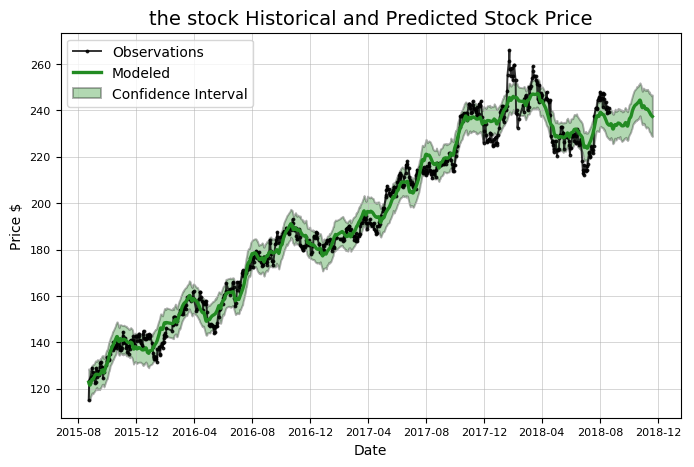

In [0]:
model, model_data = tsmc.create_prophet_model(days=90)

### 評估預測與真實的結果差異


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $248.37.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.55.
Average Absolute Error on Testing  Data = $15.41.

When the model predicted an increase, the price increased 45.95% of the time.
When the model predicted a  decrease, the price decreased  42.27% of the time.

The actual value was within the 80% confidence interval 71.54% of the time.


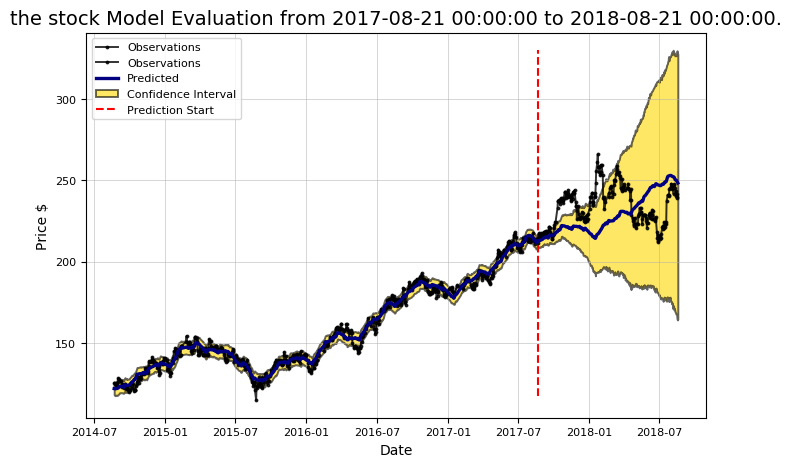

In [0]:
tsmc.evaluate_prediction()

### 同時預測短中長期股價

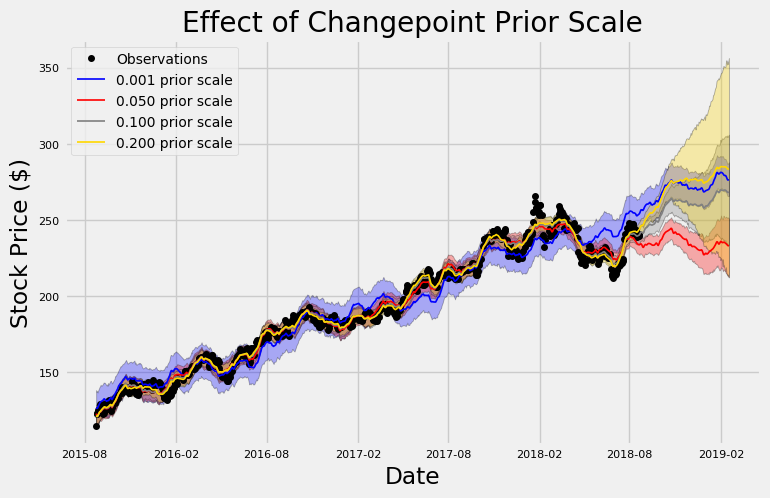

In [0]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

### 預測中期股價及區間


Predicted Increase: 

          Date    estimate    change       upper       lower
1   2018-08-22  244.637193  0.686234  249.723185  240.066579
2   2018-08-23  245.419203  0.782010  250.245556  240.761653
3   2018-08-24  246.085432  0.666229  251.324279  241.052150
5   2018-08-26  246.428856  0.343424  251.461215  241.556554
7   2018-08-28  246.427289  0.108304  251.131970  241.562638
8   2018-08-29  246.949894  0.522605  252.054560  242.076861
9   2018-08-30  247.818390  0.868496  252.463377  242.742758
10  2018-08-31  248.773709  0.955319  253.587308  244.025102
12  2018-09-02  250.148201  1.374492  254.869346  245.325502
13  2018-09-03  250.606249  0.458048  255.643715  245.730459
14  2018-09-04  251.085048  0.478798  256.140270  246.484997
15  2018-09-05  251.628185  0.543137  256.591465  246.537506
16  2018-09-06  252.177281  0.549097  257.657382  247.235929
17  2018-09-07  252.666211  0.488930  257.653476  247.463540
19  2018-09-09  253.538394  0.872183  258.864946  248.009035
2

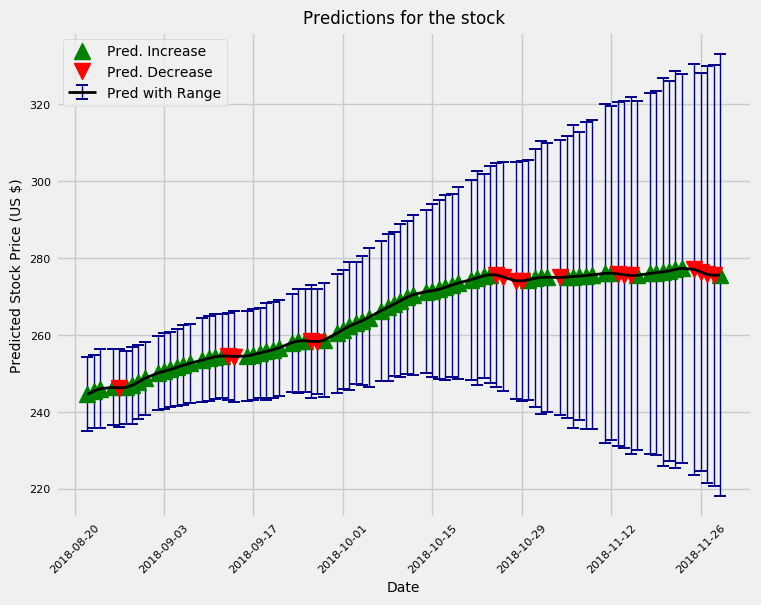

In [0]:
tsmc.predict_future(days=100)